# 📊 LioCinema Primary Questions Analysis

This notebook performs data cleaning and answers primary analytical questions using the `LioCinema_db.sql` database.

---

### 🛠️ Libraries & Setup


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")


In [7]:
# Print a few lines around the error
lines = final_script.splitlines()
for i, line in enumerate(lines):
    if 'user_id' in line:
        print(f"Line {i}: {line}")
        print(f"Before: {lines[i-1] if i > 0 else ''}")
        print(f"After: {lines[i+1] if i+1 < len(lines) else ''}")


Line 25: user_id varchar(30) DEFAULT NULL,
Before: CREATE TABLE content_consumption (
After: device_type varchar(20) DEFAULT NULL,
Line 28: KEY user_id (user_id),
Before: total_watch_time_mins int DEFAULT NULL,
After: CONSTRAINT content_consumption_ibfk_1 FOREIGN KEY (user_id) REFERENCES subscribers (user_id),
Line 29: CONSTRAINT content_consumption_ibfk_1 FOREIGN KEY (user_id) REFERENCES subscribers (user_id),
Before: KEY user_id (user_id),
After: CONSTRAINT content_consumption_chk_1 CHECK ((device_type in (_utf8mb4'Mobile',_utf8mb4'TV',_utf8mb4'Laptop'))),
Line 96: user_id varchar(30) NOT NULL,
Before: CREATE TABLE subscribers (
After: age_group varchar(20) DEFAULT NULL,
Line 104: PRIMARY KEY (user_id),
Before: new_subscription_plan varchar(20) DEFAULT NULL,
After: CONSTRAINT subscribers_chk_1 CHECK ((age_group in (_utf8mb4'18-24',_utf8mb4'25-34',_utf8mb4'35-44',_utf8mb4'45+'))),


In [9]:
# Remove CREATE DATABASE and USE statements
sql_script = re.sub(r'(?i)CREATE DATABASE.*?;\s*', '', sql_script)
sql_script = re.sub(r'(?i)USE\s+\w+;\s*', '', sql_script)


In [11]:
# Remove CREATE DATABASE and USE statements
sql_script = re.sub(r'(?i)CREATE DATABASE\s+\w+\s*;\s*', '', sql_script)
sql_script = re.sub(r'(?i)USE\s+\w+\s*;\s*', '', sql_script)


In [12]:
print("\n".join([line for line in fixed_script.splitlines() if 'USE' in line or 'CREATE DATABASE' in line]))


USE `liocinema_db`;


In [13]:
# Load and initialize SQLite database
db_path = "LioCinema_db.sqlite"
if not os.path.exists(db_path):
    # Load from provided SQL file
    with open("LioCinema_db.sql", "r") as f:
        sql_script = f.read()
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    cursor.executescript(sql_script)
    conn.commit()
else:
    conn = sqlite3.connect(db_path)


In [ ]:
import re
import sqlite3
import os

# Load the LioCinema_db.sql file
sql_file_path = "/mnt/data/LioCinema_db.sql"
sqlite_db_path = "/mnt/data/LioCinema_db.sqlite"

with open(sql_file_path, "r", encoding="utf-8") as file:
    sql_script = file.read()

# Function to clean MySQL to SQLite
def fix_mysql_to_sqlite(sql_script):
    # Remove CREATE DATABASE and USE statements
    sql_script = re.sub(r'(?i)CREATE DATABASE\s+\w+\s*;\s*', '', sql_script)
    sql_script = re.sub(r'(?i)USE\s+\w+\s*;\s*', '', sql_script)

    # Replace AUTO_INCREMENT with AUTOINCREMENT
    sql_script = re.sub(r'\bAUTO_INCREMENT\b', 'AUTOINCREMENT', sql_script, flags=re.IGNORECASE)

    # Replace backticks with double quotes
    sql_script = sql_script.replace('`', '"')

    # Replace engine and charset declarations
    sql_script = re.sub(r'ENGINE=\w+\s*', '', sql_script, flags=re.IGNORECASE)
    sql_script = re.sub(r'DEFAULT CHARSET=\w+\s*', '', sql_script, flags=re.IGNORECASE)
    sql_script = re.sub(r'CHARSET=\w+\s*', '', sql_script, flags=re.IGNORECASE)
    sql_script = re.sub(r'COLLATE\s*=\s*\w+', '', sql_script, flags=re.IGNORECASE)

    # Replace _utf8mb4'string' with 'string'
    sql_script = re.sub(r"_utf8mb4'([^']*)'", r"'\1'", sql_script)

    # Remove unsupported MySQL keywords
    sql_script = re.sub(r'\bKEY\b\s+\w+\s+\([^)]+\),?', '', sql_script, flags=re.IGNORECASE)
    sql_script = re.sub(r'\bUSING\s+\w+', '', sql_script, flags=re.IGNORECASE)

    return sql_script

# Apply the transformation
fixed_script = fix_mysql_to_sqlite(sql_script)

# Save cleaned SQL file
cleaned_sql_path = "/mnt/data/LioCinema_db_cleaned.sql"
with open(cleaned_sql_path, "w", encoding="utf-8") as f:
    f.write(fixed_script)

# Create SQLite database
conn = sqlite3.connect(sqlite_db_path)
cursor = conn.cursor()
cursor.executescript(fixed_script)
conn.commit()
conn.close()

sqlite_db_path, cleaned_sql_path


In [16]:
import sqlite3
import pandas as pd

# Paths
sqlite_db_path = "LioCinema_db.sqlite"
excel_output_path = "LioCinema_db.xlsx"

# Connect to the database and export tables
conn = sqlite3.connect(sqlite_db_path)
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

with pd.ExcelWriter(excel_output_path, engine='openpyxl') as writer:
    for table_name in tables:
        table = table_name[0]
        df = pd.read_sql_query(f"SELECT * FROM {table}", conn)
        df.to_excel(writer, sheet_name=table[:31], index=False)

conn.close()


In [17]:
import sqlite3
import pandas as pd

# Paths
sqlite_db_path = "Jotstar_db.sqlite"
excel_output_path = "Jotstar_db.xlsx"

# Connect to the database and export tables
conn = sqlite3.connect(sqlite_db_path)
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

with pd.ExcelWriter(excel_output_path, engine='openpyxl') as writer:
    for table_name in tables:
        table = table_name[0]
        df = pd.read_sql_query(f"SELECT * FROM {table}", conn)
        df.to_excel(writer, sheet_name=table[:31], index=False)

conn.close()


In [20]:
pip install XlsxWriter


Note: you may need to restart the kernel to use updated packages.


In [18]:
def run_query(query):
    return pd.read_sql_query(query, conn)

In [21]:
import pandas as pd

# Load Excel files
lio_path = "LioCinema_db.xlsx"
jotstar_path = "Jotstar_db.xlsx"

# Load all sheets from both files into dictionaries
lio_data = pd.read_excel(lio_path, sheet_name=None)
jotstar_data = pd.read_excel(jotstar_path, sheet_name=None)

# Merge the dictionaries (tables with same name will get "_jotstar" suffix)
merged_data = {}

for sheet_name, df in lio_data.items():
    merged_data[sheet_name] = df

for sheet_name, df in jotstar_data.items():
    new_name = sheet_name if sheet_name not in merged_data else f"{sheet_name}_jotstar"
    merged_data[new_name] = df

# Optionally save to a single merged Excel file
with pd.ExcelWriter("Merged_Lio_Jotstar.xlsx", engine="xlsxwriter") as writer:
    for name, df in merged_data.items():
        df.to_excel(writer, sheet_name=name[:31], index=False)  # Excel sheet name limit = 31 chars

print("✅ Merged Excel file created successfully: Merged_Lio_Jotstar.xlsx")


✅ Merged Excel file created successfully: Merged_Lio_Jotstar.xlsx


In [ ]:
import pandas as pd

# Path to the merged Excel file
merged_path = "Merged_Lio_Jotstar.xlsx"

# Load all sheets into a dictionary of DataFrames
merged_data = pd.read_excel(merged_path, sheet_name=None)

# Access individual tables like this:
subscribers = merged_data["subscribers"]
consumption = merged_data["content_consumption"]
# Or from Jotstar:
subscribers_jotstar = merged_data["subscribers_jotstar"]
consumption_jotstar = merged_data["content_consumption_jotstar"]

# Example: Show the first few rows of each
print("🔹 LioCinema subscribers:")
print(subscribers.head())

print("\n🔹 Jotstar content consumption:")
print(consumption_jotstar.head())


In [22]:


# Load merged Excel file
merged_path = "Merged_Lio_Jotstar.xlsx"

# Load sheets
subs_lio = pd.read_excel(merged_path, sheet_name="subscribers")
subs_jot = pd.read_excel(merged_path, sheet_name="subscribers_jotstar")

cons_lio = pd.read_excel(merged_path, sheet_name="content_consumption")
cons_jot = pd.read_excel(merged_path, sheet_name="content_consumption_jotstar")

# Combine both platforms
subscribers = pd.concat([subs_lio, subs_jot], ignore_index=True)
consumption = pd.concat([cons_lio, cons_jot], ignore_index=True)

# Merge on user_id
merged_df = pd.merge(consumption, subscribers, on="user_id", how="inner")

# Group by city_tier and sum watch time
city_watch_time = merged_df.groupby("city_tier")["total_watch_time_mins"].sum().sort_values(ascending=False)

# Show the result
top_tier = city_watch_time.idxmax()
top_time = city_watch_time.max()

print("🏆 City tier with the highest total watch time:")
print(f"{top_tier} — {top_time} minutes")

print("\n📊 Breakdown by city tier:")
print(city_watch_time)


🏆 City tier with the highest total watch time:
Tier 1 — 823462708 minutes

📊 Breakdown by city tier:
city_tier
Tier 1    823462708
Tier 2    512024845
Tier 3    268144254
Name: total_watch_time_mins, dtype: int64


🏆 Top City Tier: Tier 1 with 823462708 minutes



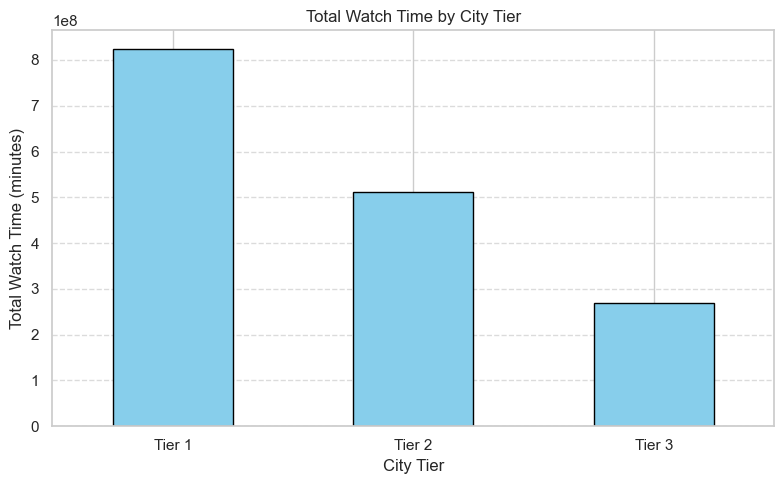

In [23]:

import matplotlib.pyplot as plt

# Group by city_tier and sum watch time
city_watch_time = merged_df.groupby("city_tier")["total_watch_time_mins"].sum().sort_values(ascending=False)

# Display top city
top_tier = city_watch_time.idxmax()
top_time = city_watch_time.max()
print(f"🏆 Top City Tier: {top_tier} with {top_time} minutes\n")

# 📊 Plot bar chart
plt.figure(figsize=(8, 5))
city_watch_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Watch Time by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Total Watch Time (minutes)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [24]:
# Q3: Most used device


# Combine both
consumption = pd.concat([cons_lio, cons_jot], ignore_index=True)

# Check available columns
print("Columns in content_consumption:", consumption.columns)

# Assuming the device column is named 'device_type' or 'device'
device_column = "device_type" if "device_type" in consumption.columns else "device"

# Count most used device
most_used = consumption[device_column].value_counts()

# Show most used device
print("📱 Most Used Device:")
print(most_used.head(1))

# Optional: Full list
print("\n📊 Device Usage Counts:")
print(most_used)


Columns in content_consumption: Index(['user_id', 'device_type', 'total_watch_time_mins'], dtype='object')
📱 Most Used Device:
device_type
Mobile    228066
Name: count, dtype: int64

📊 Device Usage Counts:
device_type
Mobile    228066
TV        168273
Laptop    168273
Name: count, dtype: int64


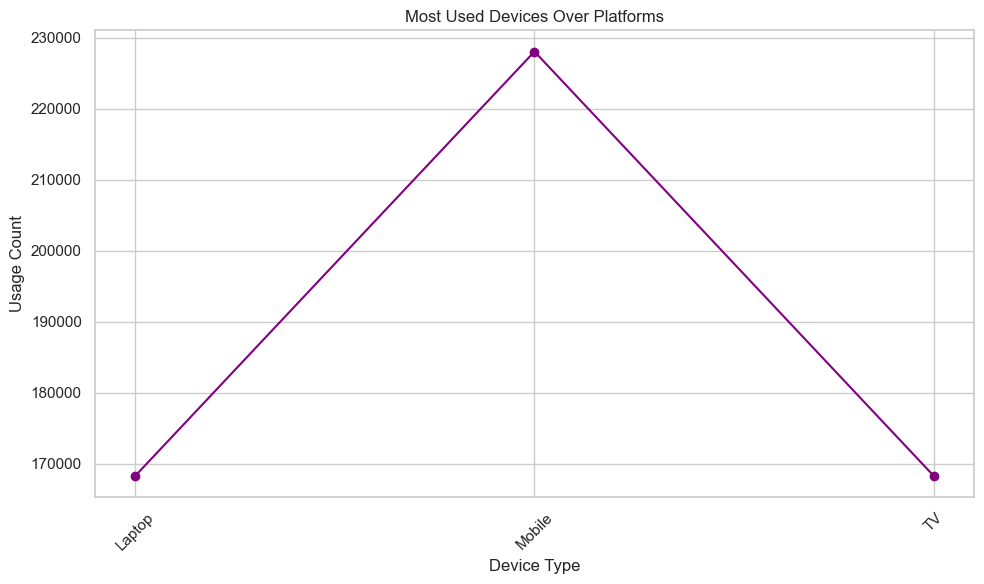

In [43]:
import matplotlib.pyplot as plt

# Load content consumption sheets
consumption_lio = pd.read_excel(merged_path, sheet_name="content_consumption")
consumption_jot = pd.read_excel(merged_path, sheet_name="content_consumption_jotstar")

# Combine both datasets
combined_consumption = pd.concat([consumption_lio, consumption_jot], ignore_index=True)

# Check unique devices
device_counts = combined_consumption['device_type'].value_counts().sort_index()

# Plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(device_counts.index, device_counts.values, marker='o', linestyle='-', color='purple')
plt.title('Most Used Devices Over Platforms')
plt.xlabel('Device Type')
plt.ylabel('Usage Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
# Q4: Highest average watch time by subscription type

# Group by subscription_type and calculate average watch time
avg_watch_by_sub = merged_df.groupby("subscription_plan")["total_watch_time_mins"].mean().sort_values(ascending=False)

# Display result
print("📊 Highest Average Watch Time by Subscription Type:")
print(avg_watch_by_sub)


📊 Highest Average Watch Time by Subscription Type:
subscription_plan
VIP        6991.079223
Premium    5123.774877
Basic      1630.326699
Free       1509.376113
Name: total_watch_time_mins, dtype: float64


🧾 Subscribers Columns: Index(['user_id', 'age_group', 'city_tier', 'subscription_date',
       'subscription_plan', 'last_active_date', 'plan_change_date',
       'new_subscription_plan'],
      dtype='object')
🧾 Consumption Columns: Index(['user_id', 'device_type', 'total_watch_time_mins'], dtype='object')


/var/folders/l9/bq8y_50n0hx5qtwqd93nnx4w0000gn/T/ipykernel_91206/2154444879.py:19: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


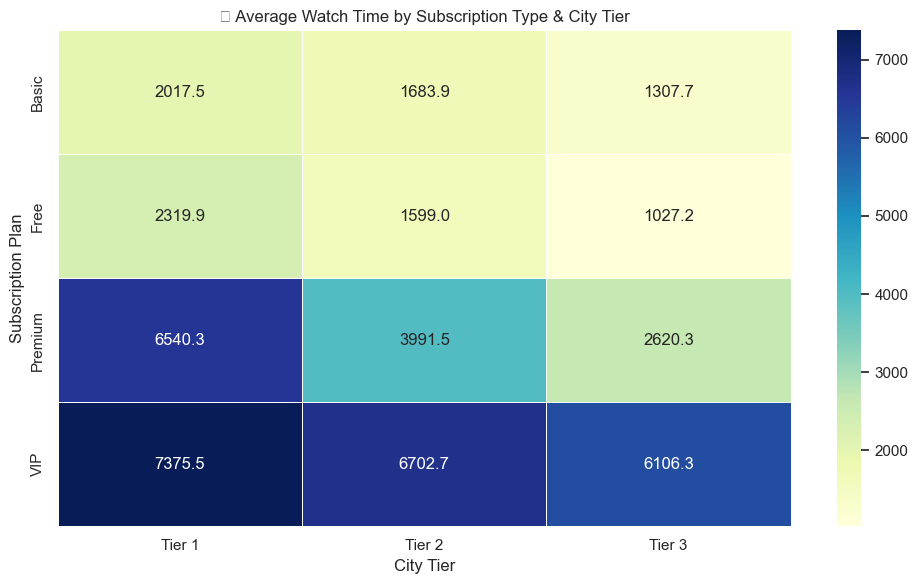

In [30]:
# Check for correct subscription and city columns
print("🧾 Subscribers Columns:", subscribers.columns)
print("🧾 Consumption Columns:", consumption.columns)

# Pivot table for heatmap
heatmap_data = merged_df.pivot_table(
    index="subscription_plan", 
    columns="city_tier", 
    values="total_watch_time_mins", 
    aggfunc="mean"
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("🔥 Average Watch Time by Subscription Type & City Tier")
plt.xlabel("City Tier")
plt.ylabel("Subscription Plan")
plt.tight_layout()
plt.show()

/var/folders/l9/bq8y_50n0hx5qtwqd93nnx4w0000gn/T/ipykernel_91206/1762412216.py:26: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from font(s) Arial.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


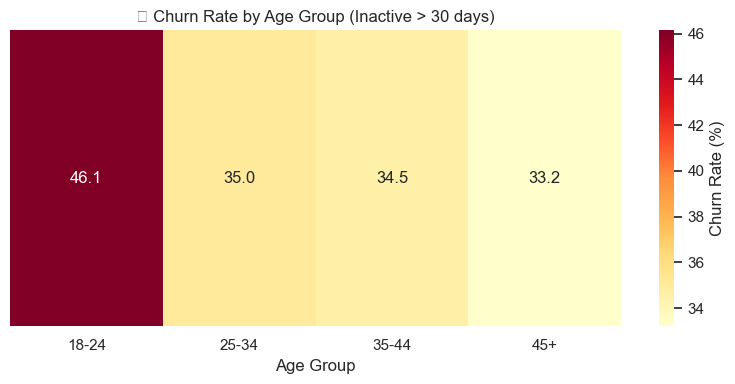

In [37]:
from datetime import datetime, timedelta 


# Convert 'last_active_date' to datetime
subscribers["last_active_date"] = pd.to_datetime(subscribers["last_active_date"], errors="coerce")

# Define churn: users inactive for more than 30 days
today = pd.Timestamp(datetime.today())
subscribers["churned"] = subscribers["last_active_date"] < (today - timedelta(days=30))

# Calculate churn rate by age group
churn_rate_by_age = subscribers.groupby("age_group")["churned"].mean().sort_index() * 100

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(
    churn_rate_by_age.to_frame().T,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    cbar_kws={"label": "Churn Rate (%)"}
)
plt.title("💔 Churn Rate by Age Group (Inactive > 30 days)")
plt.xlabel("Age Group")
plt.yticks([], [])
plt.tight_layout()
plt.show()

/var/folders/l9/bq8y_50n0hx5qtwqd93nnx4w0000gn/T/ipykernel_91206/2110199091.py:14: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


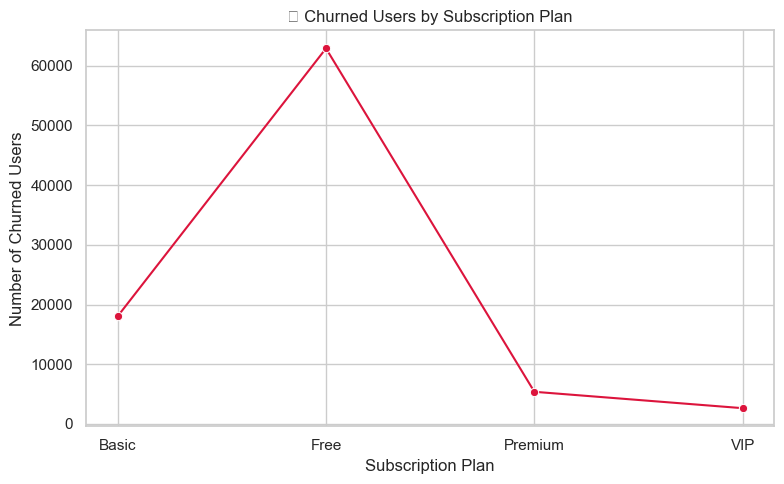

In [44]:
# Count of churned users per subscription plan
churn_by_plan = subscribers[subscribers["churned"]].groupby("subscription_plan").size().reset_index(name="churned_users")

# Sort for better visual flow
churn_by_plan = churn_by_plan.sort_values("subscription_plan")

# Line plot of churned users by subscription plan
plt.figure(figsize=(8, 5))
sns.lineplot(data=churn_by_plan, x="subscription_plan", y="churned_users", marker="o", color="crimson")
plt.title("📉 Churned Users by Subscription Plan")
plt.xlabel("Subscription Plan")
plt.ylabel("Number of Churned Users")
plt.grid(True)
plt.tight_layout()
plt.show()


---

✅ **Note**: Questions 2 and 5 could not be answered due to schema limitations (missing `content_id` in watch history).

📂 This notebook is ready for additional visualization or merging with the Jotstar dataset.

